In [55]:
import time
from datetime import datetime, date, timedelta
import matplotlib
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation
import neurokit2 as nk
import numpy as np
import pandas as pd
import pylab
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
pylab.rcParams['figure.figsize'] = (10, 10)

In [2]:
myheader2 = ["Time", "HeartRate/BVP", "Brain/EMG", "SkinConductance", "SkinTemp.", "RespirationRate"]
df2 = pd.read_csv("Adam - 072922.txt", skiprows = 7, header=0, names = myheader2)
df2 = df2.assign ( increment=lambda x: (1/256)*(x.index % 16))
df2 = df2.assign ( timestamp=lambda x: x['Time'] + x['increment'] )
df2 = df2.set_index("timestamp")
print("Data: Data Frame")
print(df2.head(32))

Data: Data Frame
               Time  HeartRate/BVP  Brain/EMG  SkinConductance  SkinTemp.  \
timestamp                                                                   
0.003906   0.003906          0.009     16.508            8.124     33.098   
0.007812   0.003906          0.143     15.576            8.124     33.098   
0.011719   0.003906          0.655     14.488            8.124     33.098   
0.015625   0.003906          1.839     13.245            8.124     33.098   
0.019531   0.003906          3.952     13.400            8.124     33.098   
0.023438   0.003906          7.165     13.659            8.124     33.098   
0.027344   0.003906         11.549     13.245            8.124     33.098   
0.031250   0.003906         17.070     12.624            8.123     33.098   
0.035156   0.003906         23.602     11.899            8.123     33.098   
0.039062   0.003906         30.948     12.002            8.123     33.098   
0.042969   0.003906         38.860     12.468            8.

In [3]:
myheader = ["time", "Level", "Speed", "Z position", "X position", "Y Rotation", "Steering", "Acc.", "Brake", "Event ID", "n/a"]
df = pd.read_csv("07292022_0226_data.txt", skiprows = 0, header=0, names = myheader)
print("Data: Data Frame")
print(df.head(32))
print(df.describe())

Data: Data Frame
                       time  Level     Speed  Z position  X position  \
0   07/29/2022 02:26:51.278      1  0.000000    -17607.0      304.43   
1   07/29/2022 02:26:51.441      1  0.195808    -17607.0      304.43   
2   07/29/2022 02:26:54.618      1  0.391614    -17607.0      304.43   
3   07/29/2022 02:26:54.620      1  0.587421    -17607.0      304.43   
4   07/29/2022 02:26:54.622      1  0.783226    -17607.0      304.43   
5   07/29/2022 02:26:54.623      1  0.979030    -17607.0      304.43   
6   07/29/2022 02:26:54.624      1  1.174834    -17607.0      304.43   
7   07/29/2022 02:26:54.625      1  1.370637    -17607.0      304.43   
8   07/29/2022 02:26:54.625      1  1.566439    -17607.0      304.43   
9   07/29/2022 02:26:54.626      1  1.762240    -17607.0      304.43   
10  07/29/2022 02:26:54.626      1  1.958041    -17607.0      304.43   
11  07/29/2022 02:26:54.627      1  2.153841    -17607.0      304.43   
12  07/29/2022 02:26:54.628      1  2.349640   

In [79]:
startts = datetime(2022, 7, 29, 2, 26, 51)

datestr = "07/29/2022 02:26:51.278"
d = datetime.strptime(datestr, "%m/%d/%Y %H:%M:%S.%f")

#print(datetime.strptime("%M/%d/%y df["time"] - startts)
df['time'] = pd.to_datetime(df['time'], format="%m/%d/%Y %H:%M:%S.%f")
df['offset'] =  (df['time'] - startts)
df = df.set_index("offset")
df.head()

,time,Level,Speed,Z position,X position,Y Rotation,Steering,Acc.,Brake,Event ID,n/a,changes
offset,,,,,,,,,,,,
0 days 00:00:00.278000,2022-07-29 02:26:51.278,1,0.000000,-17607.0,304.43,0.0,0.000000,0.0,0.0,FreeDriving,NaN,True
0 days 00:00:00.441000,2022-07-29 02:26:51.441,1,0.195808,-17607.0,304.43,0.0,0.000854,0.0,0.0,FreeDriving,NaN,False
0 days 00:00:03.618000,2022-07-29 02:26:54.618,1,0.391614,-17607.0,304.43,0.0,0.000854,0.0,0.0,FreeDriving,NaN,False
0 days 00:00:03.620000,2022-07-29 02:26:54.620,1,0.587421,-17607.0,304.43,0.0,0.000854,0.0,0.0,FreeDriving,NaN,False
0 days 00:00:03.622000,2022-07-29 02:26:54.622,1,0.783226,-17607.0,304.43,0.0,0.000854,0.0,0.0,FreeDriving,NaN,False


[Timedelta('0 days 00:00:00.278000'), Timedelta('0 days 00:11:48.519000'), Timedelta('0 days 00:11:58.941000'), Timedelta('0 days 00:12:13.120000'), Timedelta('0 days 00:12:20.703000'), Timedelta('0 days 00:12:27.787000'), Timedelta('0 days 00:12:36.858000'), Timedelta('0 days 00:12:39.005000'), Timedelta('0 days 00:14:09.383000'), Timedelta('0 days 00:14:15.938000'), Timedelta('0 days 00:14:19.542000'), Timedelta('0 days 00:14:24.281000'), Timedelta('0 days 00:14:30.619000'), Timedelta('0 days 00:14:31.813000'), Timedelta('0 days 00:16:40.446000'), Timedelta('0 days 00:16:49.922000'), Timedelta('0 days 00:16:55.187000'), Timedelta('0 days 00:17:07.955000'), Timedelta('0 days 00:17:27.492000'), Timedelta('0 days 00:17:28.703000'), Timedelta('0 days 00:18:48.343000'), Timedelta('0 days 00:19:03.823000'), Timedelta('0 days 00:19:06.398000'), Timedelta('0 days 00:19:10.076000'), Timedelta('0 days 00:19:13.111000'), Timedelta('0 days 00:19:13.976000'), Timedelta('0 days 00:21:16.512000'), 

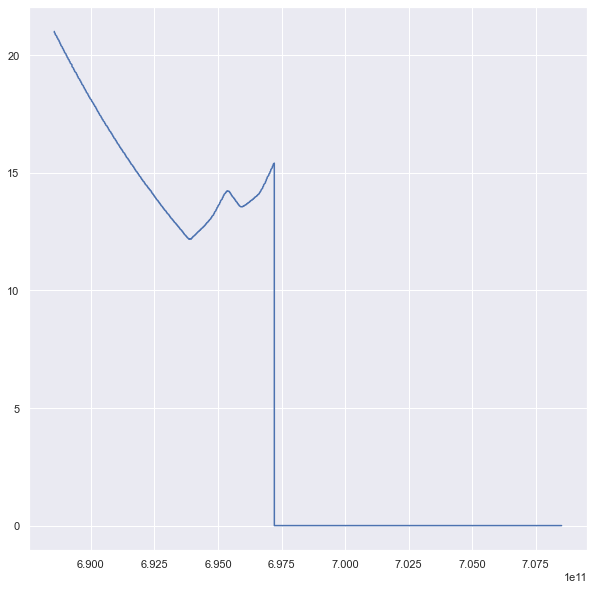

In [82]:
changes = df['Event ID'].shift() != df['Event ID']
df = df.assign(changes = changes)
timestamps_of_changes = df.index[df['changes']].tolist()
print(timestamps_of_changes)

Tseconds = timedelta(seconds = 20)


plt.plot(df["Speed"][(timestamps_of_changes[1]-Tseconds):timestamps_of_changes[1]])


#plt.xlim([2022-7-29 2:26:51.278,])
#plt.plot(df2['HeartRate/BVP'],color='r', label='Heart Rate')
#plt.plot(df2['Brain/EMG'],color='g', label='Brain/EMG')